In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

РЕАКЦИЯ!
We have an excellent dataset which contains information about the life and academic success of students studying mathematics and Portuguese language.

I am very interested to examine in detail the information about the students and to find out what influences their grades the most. The owner of the dataset suggests paying attention to the amount of alcohol consumed by students.

This is a really interesting topic! Let's begin.

In [3]:
# Data import & Fusion
math_data = pd.read_csv("student-mat.csv", sep=",")
port_data = pd.read_csv("student-por.csv", sep=",")
data = [math_data, port_data]
data = pd.concat(data)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Реакция!!
Lots of data. This is very encouraging! I can assume that many of the data obtained by questioning. For example, alcohol consumption. 1 is low and 5 is high. But for someone to drink a glass of wine once a week is a lot, and for someone it is considered insignificant. It would be better to have precise values. First, let's look at the gender of our students. Count the number of boys and girls.

Много данных. Это очень обнадеживает! Я могу предположить, что многие данные получены путем анкетирования. Например, употребление алкоголя. 1 - это низкий уровень, а 5 - высокий. Но для кого-то выпить бокал вина раз в неделю - это много, а для кого-то это считается незначительным. Было бы лучше иметь точные значения. Во-первых, давайте посмотрим на пол наших студентов. Подсчитайте количество мальчиков и девочек.

## sex - student's sex (binary: 'F' - female or 'M' - male)

Text(0.5, 1.0, 'Gender of students : F - female,M - male')

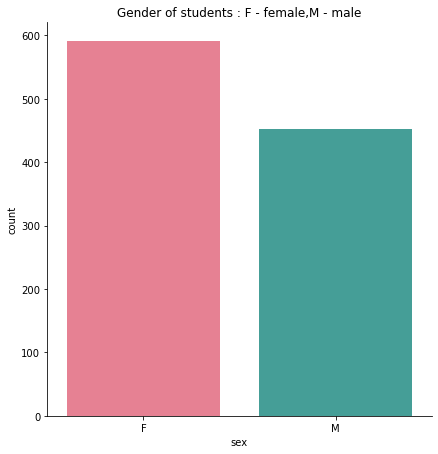

In [4]:
sns.catplot(x="sex", kind="count",palette="husl", data=data, height = 6)#vlag,hls
plt.title("Gender of students : F - female,M - male")

Реакция!!!
нужно написать

## age - student's age (numeric: from 15 to 22)
Now let's pay attention to the age of students. After all, we assume, for example, that the younger the student, the less likely that s/he uses alcohol.

Теперь давайте обратим внимание на возраст студентов. В конце концов, мы предполагаем, например, что чем моложе студент, тем меньше вероятность того, что он/она употребляет алкоголь.

In [5]:
ages = data["age"].value_counts()
labels = np.array(ages.index)
sizes = np.array((ages / ages.sum()) * 100)

trace = go.Pie(labels=labels, values=sizes)  # hole=.3
layout = go.Layout(title="Аge of students")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="age")


Реакция!!!
And so, basically we are dealing with students of 15-18 years. The most beautiful, but very often is a difficult age. Teenagers want to relax more with friends and spend less time learning math :D

И так, в основном мы имеем дело со студентами 15-18 лет. Самый красивый, но очень часто это трудный возраст. Подростки хотят больше отдыхать с друзьями и меньше изучать математику :D

## studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 

Let's see how many hours a week students spend on their studies.

Тогда давайте посмотрим, сколько часов в неделю студенты тратят на учебу.

In [6]:
data["st_time"] = np.nan
df = [data]

for col in df:
    col.loc[col["studytime"] == 1, "st_time"] = "< 2 hours"
    col.loc[col["studytime"] == 2, "st_time"] = "2 to 5 hours"
    col.loc[col["studytime"] == 3, "st_time"] = "5 to 10 hours"
    col.loc[col["studytime"] == 4, "st_time"] = "> 10 hours"

labels = data["st_time"].unique().tolist()
amount = data["st_time"].value_counts().tolist()

colors = ["pink", "cyan", "green", "yellow"]

trace = go.Pie(
    labels=labels,
    values=amount,
    hoverinfo="label+percent",
    textinfo="value",
    textfont=dict(size=20),
    marker=dict(colors=colors, line=dict(color="#000000", width=2)),
)
dt = [trace]
layout = go.Layout(title="Study time")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename="pie")


Реакция!!!
Most students spend 2 to 10 hours a week studying. It would be better if we had the exact number of hours for each student. Personally, I think a student who spends 5 hours a week studying is a diligent student. 2 hours is not always enough. But we can pay attention to the impact of the number of hours spent studying on the final grade of the student.

Большинство студентов тратят на учебу от 2 до 5 и от 5 до 10 часов в неделю. Было бы лучше, если бы у нас было точное количество часов для каждого студента. Лично я считаю, что студент, который тратит на учебу 5 часов в неделю, является прилежным учеником. 2 часов не всегда достаточно. Но мы можем обратить внимание на влияние количества часов, потраченных на учебу, на итоговую оценку ученика.

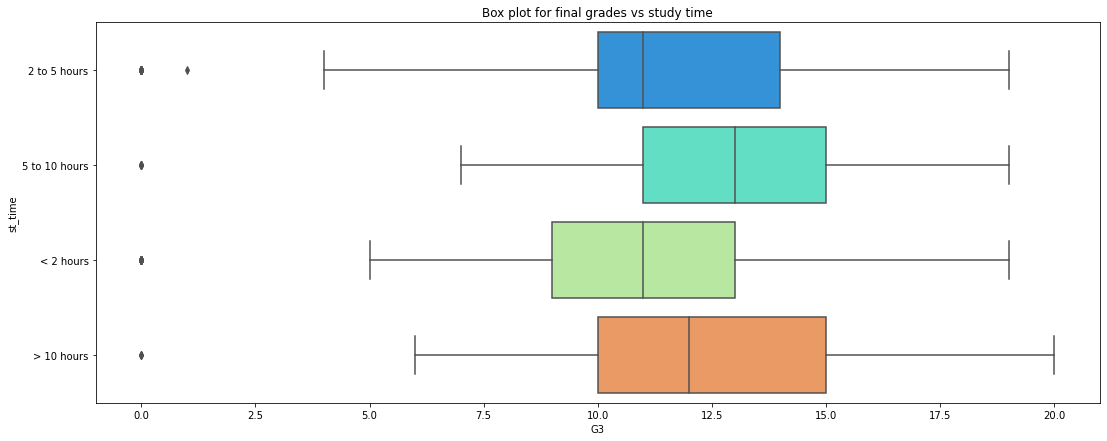

In [7]:
plt.figure(figsize=(18, 7))
plt.title("Box plot for final grades vs study time")
_ = sns.boxplot(
    y="st_time",
    x="G3",
    data=data,
    orient="h",
    palette="rainbow",
)


Реакция!!
The lowest average result is shown by students who spend less than two hours a week studying. Of course! I am a student and I can say that this time is not enough. Especially when it comes to mathematics. Few students spend more than 10 hours a week studying. But they show a very good result. Sometimes we're all lazy. But we must try to find time to study and good grades will become stable.

Самый низкий средний результат показывают студенты, которые тратят на учебу менее двух часов в неделю. Конечно! Я студент и могу сказать, что этого времени недостаточно. Особенно когда речь заходит о математике. Немногие студенты тратят на учебу более 10 часов в неделю. Но они показывают очень хороший результат. Иногда мы все ленивы. Но мы должны стараться находить время для учебы, и хорошие оценки станут стабильными.

## address - student's home address type (binary: 'U' - urban or 'R' - rural) 

We have information about the student's place of residence: city or village. Let's see. Perhaps students living in the city are much more likely to attend parties with alcohol or are busy with more interesting things than studying.


У нас есть информация о месте жительства студента: город или деревня. Давайте посмотрим. Возможно, студенты, живущие в городе, гораздо чаще посещают вечеринки с алкоголем или заняты более интересными делами, чем учеба.

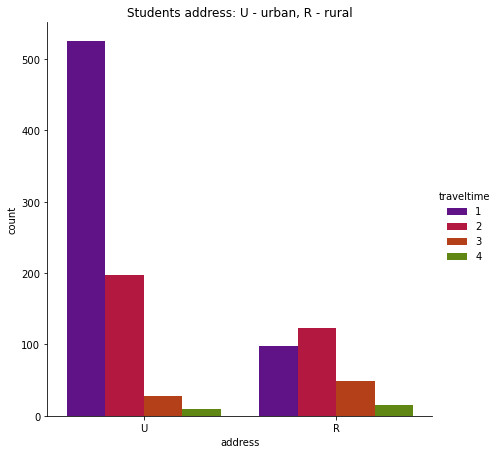

In [8]:
sns.catplot(
    x="address",
    kind="count",
    hue="traveltime",
    palette="brg",
    data=data,
    height=6,
)
_ = plt.title("Students address: U - urban, R - rural")


Реакция!!!
Majority of the students live in the city. Few students take long to get to school. But still, let's see if this affects the number of absences.

Большинство студентов живут в городе. Немногим ученикам требуется много времени, чтобы добраться до школы. Но все же давайте посмотрим, влияет ли это на количество пропусков.

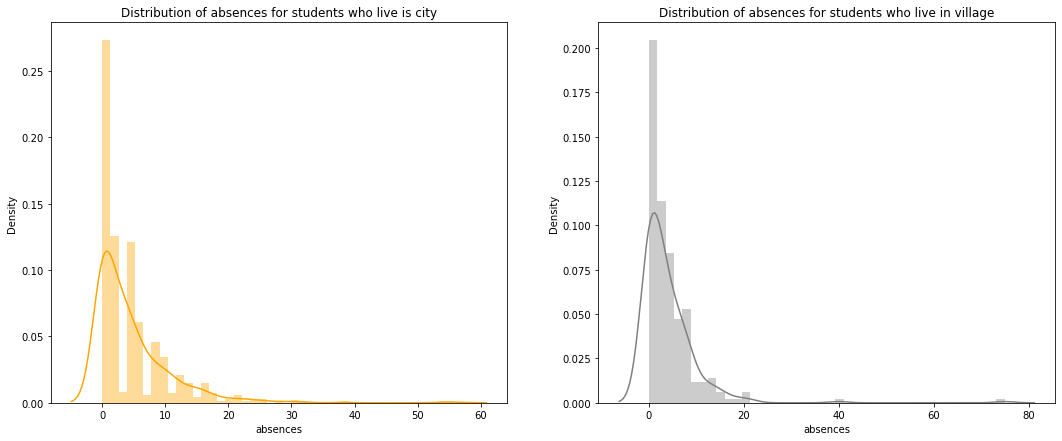

In [9]:
f = plt.figure(figsize=(18, 7))

ax = f.add_subplot(121)
sns.distplot(
    data[(data.address == "U")]["absences"],
    color="orange",
    ax=ax,
)
ax.set_title("Distribution of absences for students who live is city")

# скопируем, поменяем 121-122, U-R, orange-gray, city-village
ax = f.add_subplot(122)
sns.distplot(
    data[(data.address == "R")]["absences"],
    color="gray",
    ax=ax,
)
_ = ax.set_title("Distribution of absences for students who live in village")


Реакция!!
Yet among the students living in the village there are people with a lot of absences. But while we cannot say for sure that this is due to the fact that the student does not live in the city. But of course this may be due to traffic jams on the road or not a very good transport schedule.

Тем не менее, среди студентов, живущих в деревне, есть люди, которые часто пропускают занятия. Но пока мы не можем с уверенностью сказать, что это связано с тем, что студент не живет в городе. Но, конечно, это может быть связано с пробками на дороге или не очень хорошим графиком движения транспорта.

## romantic - with a romantic relationship (binary: yes or no) 

But let's study students absences in more detail. We have information about the romantic relationships of students: there is a relationship or not. Given the age of our students, we can assume that love has an important place in their lives. Let's see if the presence of love and relationships affects the number of absences.

Но давайте более подробно изучим отсутствие студентов. У нас есть информация о романтических отношениях студентов: есть отношения или нет. Учитывая возраст наших студентов, мы можем предположить, что любовь занимает важное место в их жизни. Давайте посмотрим, влияет ли наличие любви и отношений на количество отсутствий.

Text(0.5, 1.0, 'Distribution of absences for classes by people in love')

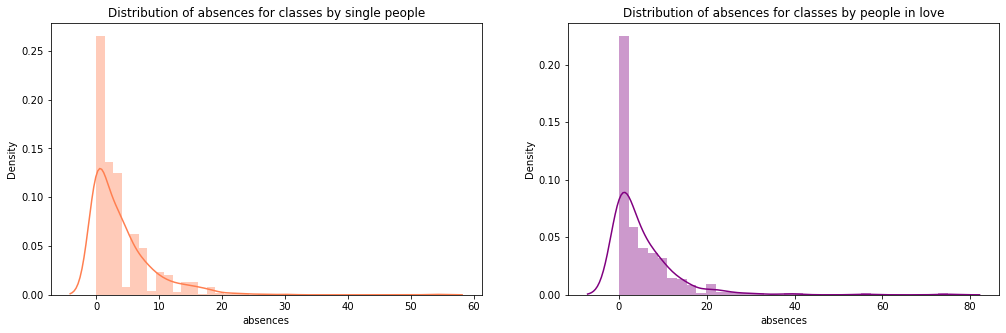

In [10]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["absences"],color='coral',ax=ax)
ax.set_title('Distribution of absences for classes by single people')

#скопируем, поменяем 121-122, no-yes, coral-purple,  single people-people in love


ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['absences'],color='purple',ax=ax)
ax.set_title('Distribution of absences for classes by people in love')

Text(0.5, 1.0, 'Distribution of absences for classes by people in love')

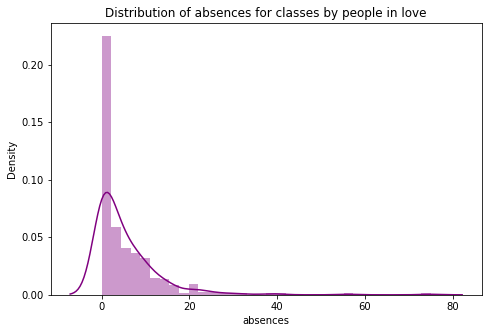

In [11]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['absences'],color='purple',ax=ax)
ax.set_title('Distribution of absences for classes by people in love')

Реакция
Oh. "Lovers do not notice the clock." Single people miss fewer classes. But how can we be mad at teenagers for being in love? Let's see if this affects the final grade./

О. "Влюбленные не замечают часов". Одинокие люди пропускают меньше занятий. Но как мы можем злиться на подростков за то, что они влюблены? Давайте посмотрим, повлияет ли это на итоговую оценку.

Text(0.5, 1.0, 'Distribution of grades in people in love')

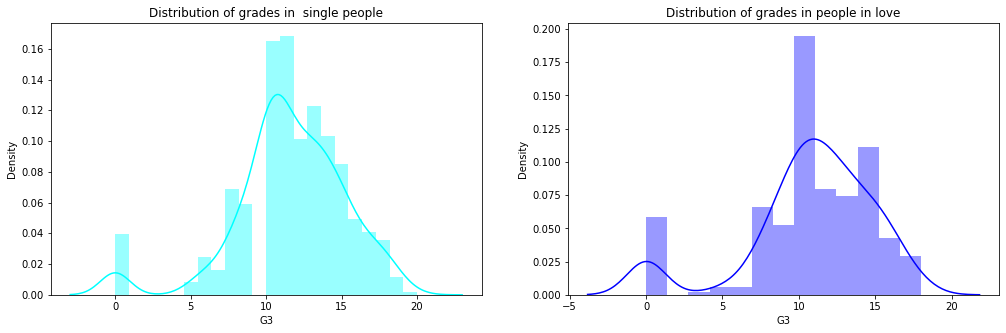

In [12]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.romantic == 'no')]["G3"],color='cyan',ax=ax)
ax.set_title('Distribution of grades in  single people')

#скопируем, поменяем 121-122, no-yes, cyan-blue,  single people-people in love

ax=f.add_subplot(122)
sns.distplot(data[(data.romantic == 'yes')]['G3'],color='blue',ax=ax)
ax.set_title('Distribution of grades in people in love')

Реакция!!
The final grades of single students are slightly higher than those who are in a romantic relationship. Of course this is due to the fact that teenagers in love want to spend more time with girlfriend or boyfriend than with a textbook. Let's count the number of single students and those who are in a relationship./

Итоговые оценки одиноких студентов немного выше, чем у тех, кто состоит в романтических отношениях. Конечно, это связано с тем, что влюбленные подростки хотят проводить больше времени с подругой или парнем, чем с учебником. Давайте посчитаем количество одиноких студентов и тех, кто состоит в отношениях.

Text(0.5, 1.0, 'How many students are in a romantic relationship?')

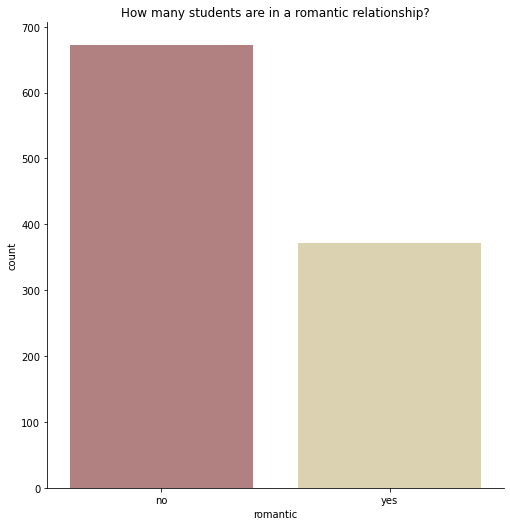

In [13]:
sns.catplot(x="romantic", kind="count",palette="pink", data=data, height = 7)
plt.title("How many students are in a romantic relationship?")

## health - current health status (numeric: from 1 - very bad to 5 - very good) 

Now let's consider one very important thing. Students' health! In our sample of young teenagers and I hope that they all have excellent health.

Теперь рассмотрим одну очень важную вещь. Здоровье студентов! В нашей выборке очень молодые подростки, и я надеюсь, что у всех у них отличное здоровье.

In [14]:
labels = data["health"].unique().tolist()
amount = data["health"].value_counts().tolist()

colors = ["coral","lightgreen","pink","cyan","white"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

dt = [trace]
layout = go.Layout(title="Current health status (numeric: from 1 - very bad to 5 - very good)")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename = 'h_chart')
## Cделаем из нее функцию, нам часто понадобится этот график

Oh. To be honest, I'm very upset.I would like to see a completely green circle. Be healthy, friends! 

О. Честно говоря, я очень расстроен.Я хотел бы видеть полностью зеленый круг. Будьте здоровы, друзья!

Let's make a function out of it, we will often need this graph/

 Cделаем из нее функцию, нам часто понадобится этот график

In [15]:
def pie_chart(data, title):
    """Shows Pie chart"""
    labels = data.unique().tolist()
    amount = data.value_counts().tolist()

    colors = ["coral","lightgreen","pink","cyan","white"]

    trace = go.Pie(labels=labels, values=amount,
                hoverinfo='label+percent', textinfo='value', 
                textfont=dict(size=20),
                marker=dict(colors=colors, 
                            line=dict(color='#000000', width=2)))

    dt = [trace]
    layout = go.Layout(title= title)

    fig = go.Figure(data=dt, layout=layout)
    iplot(fig, filename = 'h_chart')

<AxesSubplot:title={'center':'Box plot for final grades,depending on current health'}, xlabel='G3', ylabel='health'>

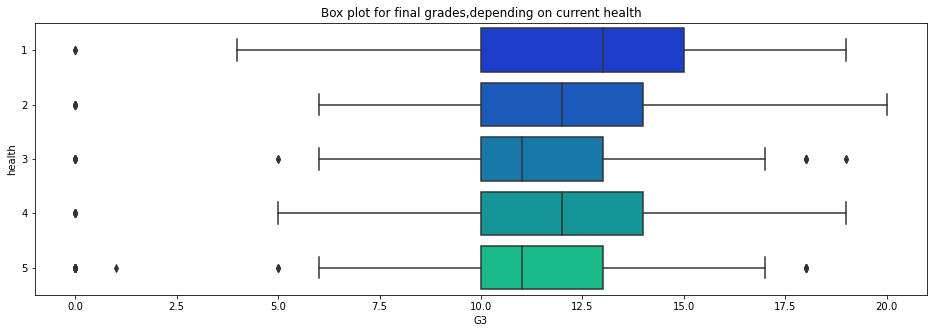

In [16]:
#Let's see if the health of the student affects final grades and the number of passes./
# Давайте посмотрим, влияет ли здоровье ученика на итоговые оценки и количество проходов.
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on current health")
sns.boxplot(y="health", x="G3", data = data , orient="h", palette = 'winter')

Реакция!!!
Interesting situation. In our enrollment, have students have very poor health. But nevertheless their final estimates are quite high. I hope that they think not only about their success in school but also about health! Also, students with very good health have high final grades. Now look at the absenteeism./

Интересная ситуация. В нашем учебном заведении есть студентов c очень слабое здоровье. Но тем не менее их окончательные оценки довольно высоки. Я надеюсь, что они думают не только о своих успехах в школе, но и о здоровье! Кроме того, учащиеся с очень хорошим здоровьем имеют высокие итоговые оценки. Теперь посмотрите на прогулы.

<AxesSubplot:title={'center':'Box plot for absences,depending on current health'}, xlabel='absences', ylabel='health'>

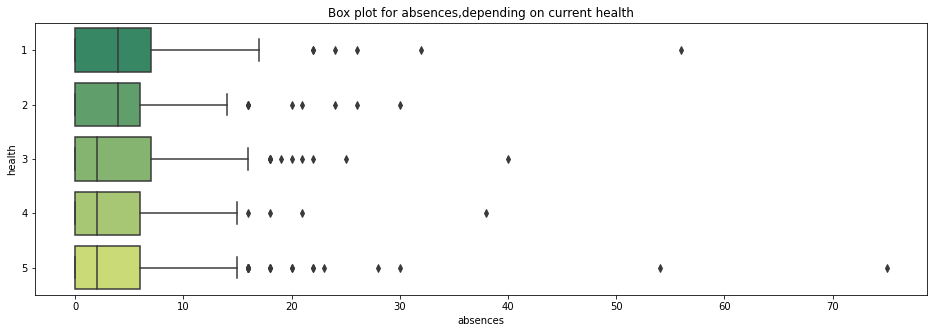

In [17]:
plt.figure(figsize=(16,5))
plt.title("Box plot for absences,depending on current health")
sns.boxplot(y="health", x="absences", data = data , orient="h", palette = 'summer')

Реакция!!
There is no tangible connection between the level of health of the student and the number of absences to classes.But here you can see that students with high final grades miss less classes :)

Нет никакой ощутимой связи между уровнем здоровья учащегося и количеством пропусков занятий.Но здесь вы можете видеть, что ученики с высокими итоговыми оценками пропускают меньше занятий :)

## Alcohol

***Dalc - work day alcohol consumption (numeric: from 1 - very low to 5 - very high)***

***Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)***

We have data on the amount of alcohol consumed by students on weekdays ("Dalc") and weekends ("Walc"). The main thing we are interested in is whether the amount of alcohol consumed affects success in school. Let's see! Let's start with alcohol consumption on weekdays.

У нас есть данные о количестве алкоголя, потребляемого студентами в будние дни ("Dalc") и выходные дни ("Walk"). Главное, что нас интересует, - влияет ли количество употребляемого алкоголя на успеваемость в школе. Давайте посмотрим! Давайте начнем с употребления алкоголя в будние дни.

In [18]:
pie_chart(data["Dalc"], title = "Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)")

Реакция!!!
Um. Most students prefer to spend a week sober or almost without alcohol. But still there is someone who likes to drink on a weekday. Let's see if that affects student grades and absences./

Большинство студентов предпочитают провести неделю трезвыми или почти без алкоголя. Но все же есть кто-то, кто любит выпить в будний день. Давайте посмотрим, влияет ли это на оценки и прогулы учащихся.

Text(0.5, 1.0, 'Distribution of absences for people who consume little alcohol on weekdays')

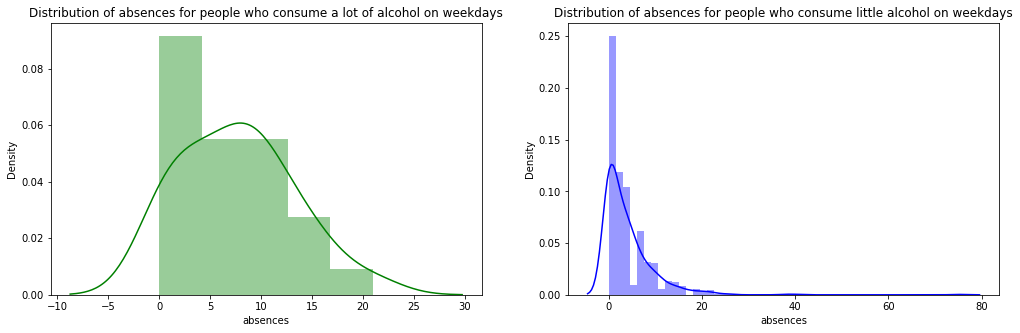

In [19]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Dalc == 5)]["absences"],color='green',ax=ax)
ax.set_title('Distribution of absences for people who consume a lot of alcohol on weekdays')
# Копируем. меняем 121-122, 5-1, green-blue, a lot- little(Будь внимательна проверь)

ax=f.add_subplot(122)
sns.distplot(data[(data.Dalc == 1)]['absences'],color='blue',ax=ax)
ax.set_title('Distribution of absences for people who consume little alcohol on weekdays')

Text(0.5, 1.0, 'Distribution of grades for people who consume little alcohol on weekdays')

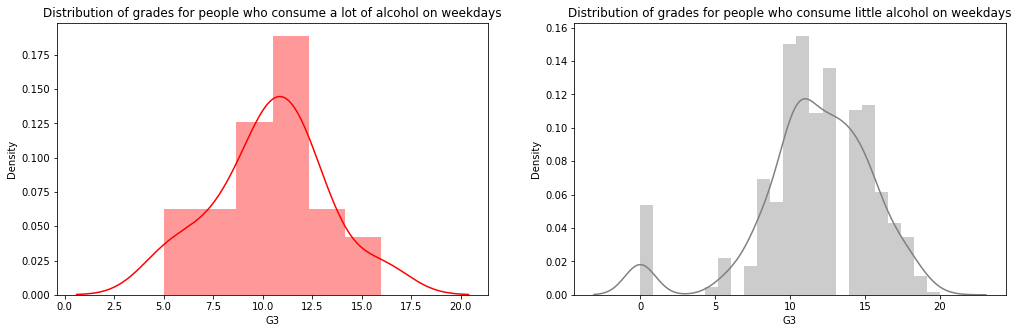

In [20]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Dalc == 5)]["G3"],color='red',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekdays')

# Копируем. меняем 121-122, 5-1, red-gray, a lot- little(Будь внимательна проверь)


ax=f.add_subplot(122)
sns.distplot(data[(data.Dalc == 1)]['G3'],color='gray',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekdays')

Реакция!!!
Drinking alcohol on weekdays is a bad idea! :D Of course, the number of those who love to drink on weekdays is much smaller than the number of those who prefer to spend weekdays sober. But we can see that the final grades of these students are significantly lower. Let's look at the situation with the consumption of alcohol on the weekend./

Употребление алкоголя в будние дни - плохая идея! :D Конечно, число тех, кто любит выпить в будние дни, намного меньше, чем число тех, кто предпочитает проводить будни трезвыми. Но мы видим, что итоговые оценки этих учеников значительно ниже. Давайте посмотрим на ситуацию с потреблением алкоголя в выходные дни.

In [21]:
pie_chart(data["Walc"], title = "Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)")

Реакция!
Of course the situation has changed. On weekends, more students like to relax and drink. I wonder what the situation will be with the final grades./

Конечно, ситуация изменилась. По выходным все больше студентов любят расслабиться и выпить. Интересно, какова будет ситуация с итоговыми оценками.


Text(0.5, 1.0, 'Distribution of grades for people who consume little alcohol on weekend')

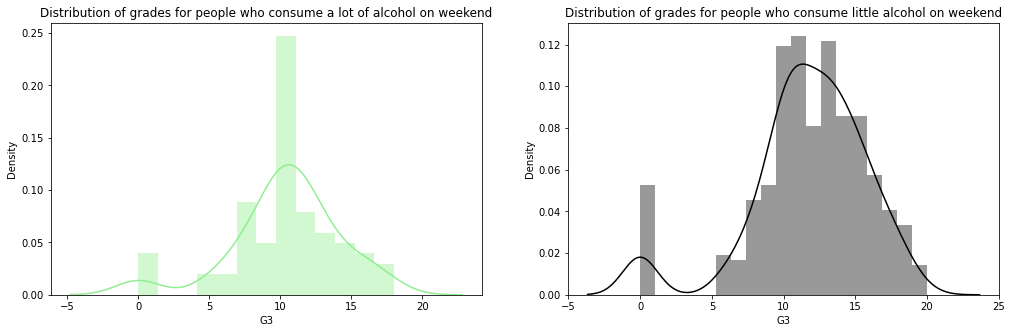

In [22]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.Walc == 5)]["G3"],color='lightgreen',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekend')

# Копируем. меняем 121-122, 5-1, lightgreen-black, a lot- little(Будь внимательна проверь)


ax=f.add_subplot(122)
sns.distplot(data[(data.Walc == 1)]['G3'],color='black',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekend')

Реакция!!
Calm down, friends. Our wine is always happy to see us on the weekend. And it seems it will not affect the grades at school(but better not abuse)./

Успокойтесь, друзья. Наше вино всегда радо видеть нас на выходных. И, похоже, это никак не повлияет на оценки в школе (но лучше не злоупотреблять).

## New

## internet - Internet access at home (binary: yes or no) 

Let's look at the availability of Internet in the home./
Давайте посмотрим  на наличие интернета в доме.

Text(0.5, 1.0, 'How many students have not Internet (yes, i am shocked too)?')

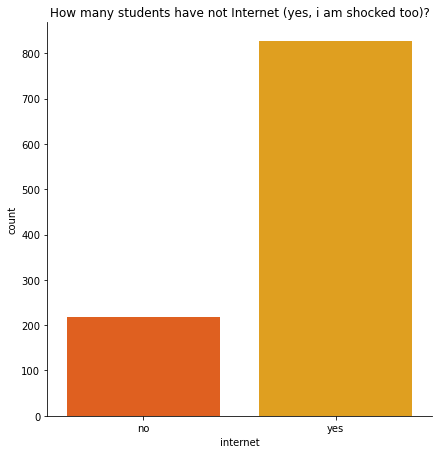

In [23]:
sns.catplot(x="internet", kind="count",palette="autumn", data=data, height = 6)
plt.title("How many students have not Internet (yes, i am shocked too)?")

Let's see whether the availability of the Internet affects the number of hours students spend on their studies./

давайте посмотрим, влияет ли доступность Интернета на количество часов, которые студенты тратят на учебу.

In [24]:
time1 =data[(data.internet == 'no')].st_time.value_counts()
labels = (np.array(time1.index))
sizes = (np.array((time1 / time1.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="How many hours do students without access to the Internet spend on studies?")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="time1")

## тут скопируем вторую чать, и вставим. Поменяем no-yes, title b time1-time2


time2 =data[(data.internet == 'yes')].st_time.value_counts()
labels = (np.array(time2.index))
sizes = (np.array((time2 / time2.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="How many hours do students with access to the Internet spend on studies?")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="time2")

Реакция!!!!
I'm shocked. They spend less time! Are these students geniuses or lazy?/

Я в шоке. Они тратят меньше времени! Являются ли эти студенты гениями или лентяями?

<AxesSubplot:title={'center':'Box plot for final grades,depending on the access to the Internet'}, xlabel='G3', ylabel='internet'>

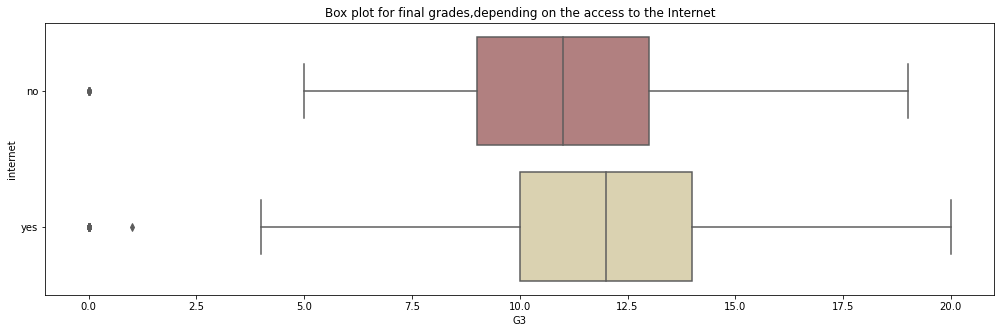

In [25]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the access to the Internet")
sns.boxplot(y="internet", x="G3", data = data , orient="h", palette = 'pink')

реакция!!!
What do you think?Are these students geniuses or lazy?
Write to me in the comments

## Family

And the last thing we'll look at is the student's family. The family plays a very important role in the development of a person. The dataset gives us a lot of information about the student's family, profession and education of parents and so on. /

И последнее, на что мы обратим внимание, - это семья студента. Семья играет очень важную роль в развитии ребенка. Набор данных дает нам много информации о семье студента, профессии и образовании родителей и так далее.

Let's start with the fact that we look at the number of people in the families of the student and the status of residence of parents
Давайте начнем с того, что посмотрим на количество человек в семьях студента и статус проживания родителей: отец и мать живут вместе или нет./

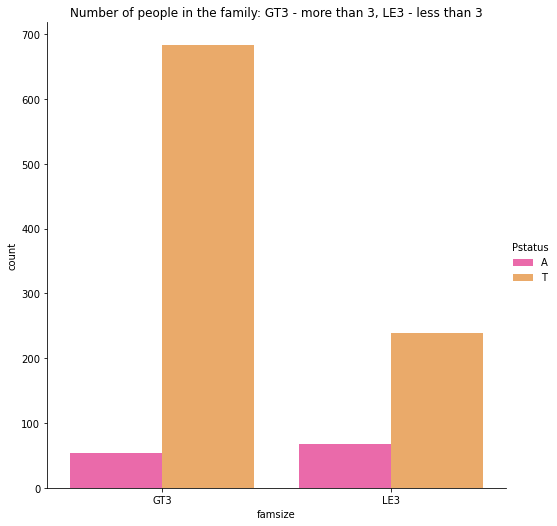

In [29]:
sns.catplot(x="famsize", kind="count",hue = "Pstatus",palette="spring", data=data, height = 7)
_ = plt.title("Number of people in the family: GT3 - more than 3, LE3 - less than 3")

Реакция!!!

I am glad that most students live with their mother and father. We have a lot of information about parents of students.
Let's see what the students mothers do. /

Я рад, что большинство студентов живут со своими родителями. У нас есть много информации о родителях учеников.
Давайте посмотрим, что делают матери студентов.

In [27]:
pie_chart(data["Mjob"], title = "Mother's job)")
pie_chart(data["Fjob"], title = "Father's job")

 1.Реакция для матери 
 
Most mothers are housewives. And it was very surprising how many mothers work in medicine. Let's see about the fathers./

Большинство матерей - домохозяйки. И было очень удивительно, как много матерей работают в медицине. Давайте посмотрим на отцов.

2. Реакция для отца

How many teachers!

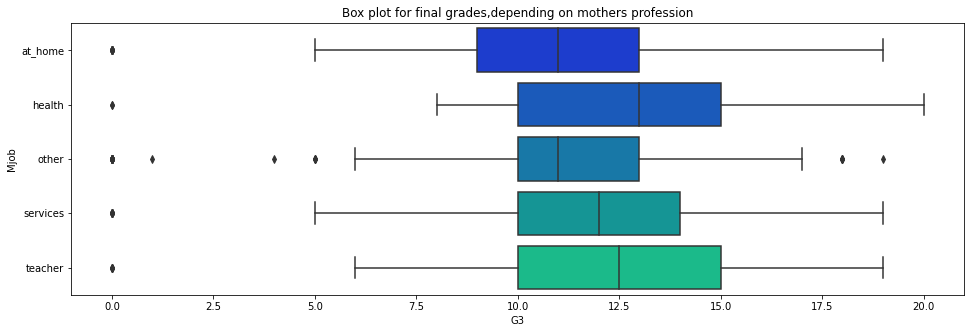

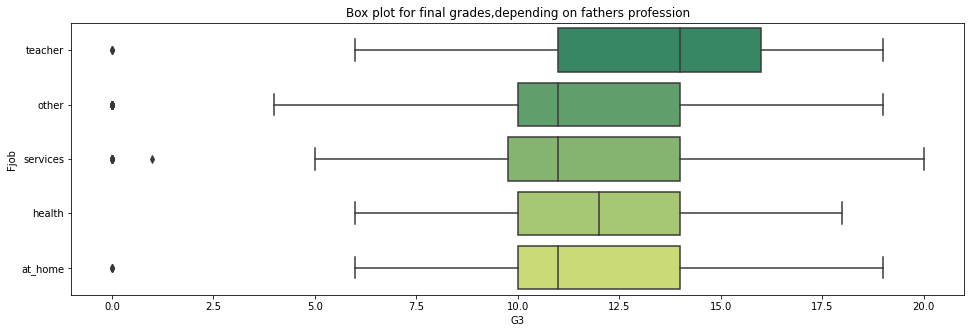

In [30]:
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on mothers profession")
sns.boxplot(y="Mjob", x="G3", data = data , orient="h", palette = 'winter')

# Тут скопировать. Поменять Mjob-Fjob и winter-summer(Внимательно проверить)
plt.figure(figsize=(16,5))
plt.title("Box plot for final grades,depending on fathers profession")
_ = sns.boxplot(y="Fjob", x="G3", data = data , orient="h", palette = 'summer')

Реакция


It seems that mothers working in medicine instill in their children a great love for studying. /


Похоже, что матери, работающие в медицине, прививают своим детям большую любовь к учебе. 


# The end

 *Is there a secret of excellent grades? Certainly. And, as we have seen, it is to dedicate enough time to studying, not to miss classes, remember that you can not spend 100% of the time with the beloved and so on. And of course not to abuse alcohol on weekdays. What about the weekend? Science gives us the right to relax on weekends!*